This is my first time using Jupyter Lab *and* Python 3, so we'll see how this goes.

In [53]:
import astropy
from astropy.io import fits
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

### Read in the data

In [2]:
# This is the file that Song said to start with.
data_file_1 = '/Users/greg/Desktop/git_projects/catalog_plots/data/s16a_massive_logmMax_11.45_z_0.25_0.47_mhalo.fits'
hdu1 = fits.open(data_file_1)

So here I'm going to list the useful bits of this data set:

`ra`: Right Ascension

`dec`: Declination
(*These will be useful when I make the galaxy map plot*)

`z_best`: Best redshift value

`logmh_host`: Virial mass


In [9]:
data_table = Table(hdu1[1].data) # For visualization, just in case.
print(data_table)

    object_id             ra         ...     logmh_vir          logmh_host    
----------------- ------------------ ... ------------------ ------------------
39622434810257696  37.32405775641403 ... 13.196176185039974 13.196176185039974
40981272268396388 136.74757710205347 ... 13.982180745596402 13.982180745596402
69617666066768181 239.96883726612327 ... 13.174059807725026 13.174059807725026
41584100993172458 339.30221049833926 ... 12.736635497686821 12.736635497686821
70408610064137875  244.6397018878286 ... 12.725176301419138 12.725176301419138
41109674610681824 178.57899754759484 ... 13.526597709103452 13.526597709103452
69630181601471641  247.1039068878523 ...  13.38524868240322  13.38524868240322
70409155524978684  243.4439765807658 ...  14.15259407792747  14.15259407792747
69626324720843995  244.1151270176698 ... 13.475816413031318 13.475816413031318
70409288668975574 243.17526955867925 ... 13.401228167498113 13.401228167498113
              ...                ... ...            

Now what I want to do is take the galaxy halo masses and assign them a radius. To do this, I will use  `Colossus` (Diemer 2017).

In [30]:
import colossus
from colossus.cosmology import cosmology
cosmology.setCosmology('planck15')
from colossus.halo import mass_so

In [5]:
data_table.colnames # find the useful columns

['object_id',
 'ra',
 'dec',
 'z_spec',
 'z_best',
 'z_phot',
 'z_type',
 'gcmodel_mag',
 'gcmodel_mag_err',
 'rcmodel_mag',
 'rcmodel_mag_err',
 'icmodel_mag',
 'icmodel_mag_err',
 'zcmodel_mag',
 'zcmodel_mag_err',
 'ycmodel_mag',
 'ycmodel_mag_err',
 'MSTAR',
 'logm_10',
 'logm_30',
 'logm_100',
 'logm_max',
 'vdisp_sdss',
 'vdisp_err_sdss',
 'logms_gama',
 'logms_err_gama',
 'id_cluster_redm',
 'p_mem_redm',
 'z_lambda_redm',
 'lambda_redm',
 'p_cen_1_redm',
 'id_camira',
 'z_camira',
 'n_cor_camira',
 'logms_camira',
 'r50_max',
 'r50_100',
 'logmh_peak',
 'logmh_vir',
 'logmh_host']

In [10]:
# Put the (useful) data into nice arrays
z_best = np.array(data_table['z_best'])
logmh_host = np.array(data_table['logmh_host'])
ra = np.array(data_table['ra'])
dec = np.array(data_table['dec'])

[ 37.32405776 136.7475771  239.96883727 ... 138.52590309 130.74449701
 238.7361554 ]


I want to slit the data into four different fields. From Song:
* G09H  RA: 130-137 (133.5)  DEC: -0.25 - 2.30 (0.96)
* G12H  RA: 178-181 (179.5)  DEC: -1.38 - 1.21 (-0.09)
* G15H  RA: 214-219 (216.5)  DEC: -1.38-  1.21 (-0.09)
* HectoMap  RA: 244.0 - 247.0 (245.5)  DEC: 42.3 - 44.3 (42.8)

In [65]:
# G09H
g09h_ra = []
g09h_dec = []
g09h_logmh_host = []
g09h_z_best = []
for i in range(len(ra)):
    if ra[i] >= 130.0 and ra[i] <= 137.0 and dec[i] >= -0.25 and dec[i] <=2.30:
            g09h_ra.append(ra[i])
            g09h_dec.append(dec[i])
            g09h_logmh_host.append(logmh_host[i])
            g09h_z_best.append(z_best[i])

# Turn the lists into arrays
g09h_ra = np.array(g09h_ra)
g09h_dec = np.array(g09h_dec)
g09h_logmh_host = np.array(g09h_logmh_host)
g09h_z_best = np.array(g09h_z_best)

# Now to find r_halo
g09h_r_halo = mass_so.M_to_R(10**g09h_logmh_host , g09h_z_best, 'vir') # kpc/h

# Turn the physical radius into an angular size
theta_per_kpc = astropy.cosmology.LambdaCDM.arcsec_per_kpc_proper(0.4)

TypeError: arcsec_per_kpc_proper() missing 1 required positional argument: 'z'

Text(0,0.5,'Dec')

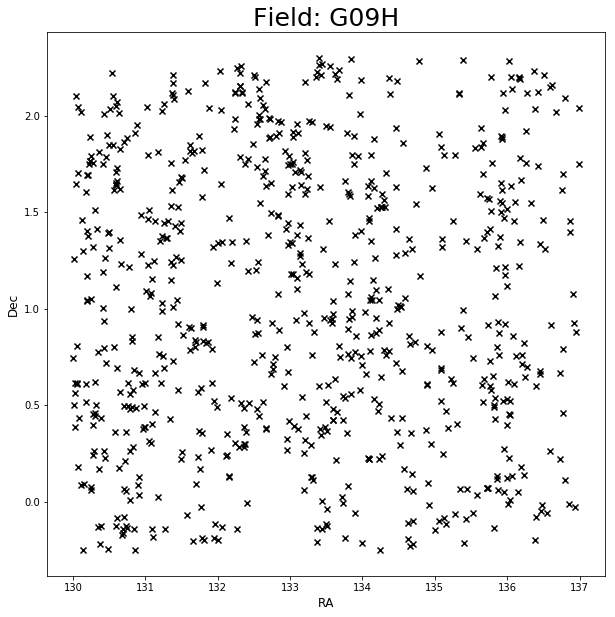

In [23]:
#Quick test plot to make sure my array cuts are good
plt.figure(figsize = [10,10])
plt.scatter(g09h_ra , g09h_dec, marker = 'x' , color = 'k')
plt.title("Field: G09H", fontsize = 25)
plt.xlabel("RA", fontsize = 12)
plt.ylabel("Dec", fontsize = 12)